# **Image Segmentation with K-means Clustering**

Load all the required libraries:

In [5]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# **Color Clustering:**
Next step is to load the image in RGB color space

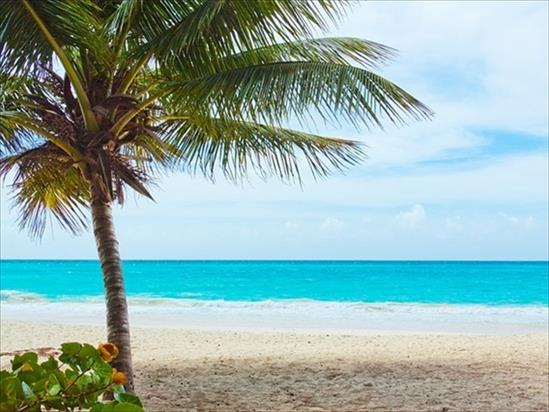

In [6]:
original_image = cv2.imread("img80.jpg")
cv2_imshow(original_image)

We need to convert our image from RGB Colours Space to HSV.

In [7]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

Next, converts the MxNx3 image into a Kx3 matrix where K=MxN and each row is now a vector in the 3-D space of RGB.


In [8]:
vectorized = img.reshape((-1,3))

In [9]:
# We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.
vectorized = np.float32(vectorized)

We are going to cluster with k = 3 because if you look at the image above it has 3 colors, green-colored grass and forest, blue sea and the greenish-blue seashore.

Define criteria, number of clusters(K) and apply k-means()

In [10]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

OpenCV provides cv2.kmeans(samples, nclusters(K), criteria, attempts, flags) function for color clustering.

1. samples: It should be of np.float32 data type, and each feature should be put in a single column.

2. nclusters(K): Number of clusters required at the end

3. criteria: It is the iteration termination criteria. When this criterion is satisfied, the algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:

Type of termination criteria. It has 3 flags as below:

cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.
4. attempts: Flag to specify the number of times the algorithm is executed using different initial labelings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

5. flags: This flag is used to specify how initial centers are taken. Normally two flags are used for this: cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

In [19]:
K = 7
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [20]:
#Now convert back into uint8.
center = np.uint8(center)

#Next, we have to access the labels to regenerate the clustered image
res = center[label.flatten()]
result_image = res.reshape((img.shape))

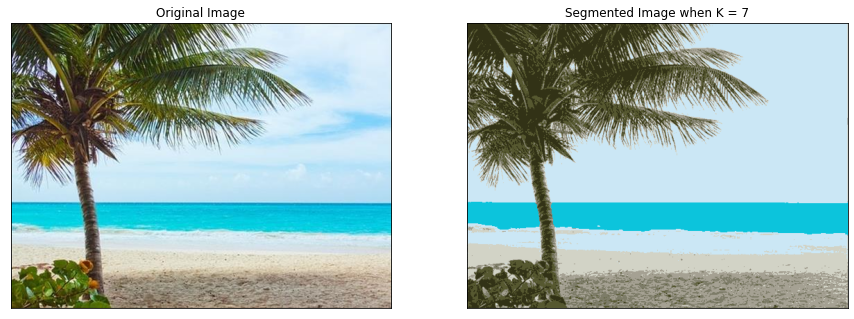

In [21]:
#Now let us visualize the output result with K=3
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()


# **Canny Edge detection:**

**Canny Edge detection**: It is an image processing method used to detect edges in an image while suppressing noise.

The Canny Edge detection algorithm is composed of 5 steps:

Gradient calculation
Non-maximum suppression
Double threshold
Edge Tracking by Hysteresis
OpenCV provides cv2.Canny(image, threshold1,threshold2) function for edge detection.

The first argument is our input image. Second and third arguments are our min and max threshold respectively.

The function finds edges in the input image(8-bit input image) and marks them in the output map edges using the Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The largest value is used to find initial segments of strong edges.

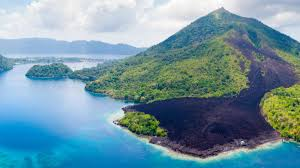

In [22]:
orig_image = cv2.imread("download.jpg")
cv2_imshow(orig_image)

In [23]:
img=cv2.cvtColor(orig_image,cv2.COLOR_BGR2RGB)

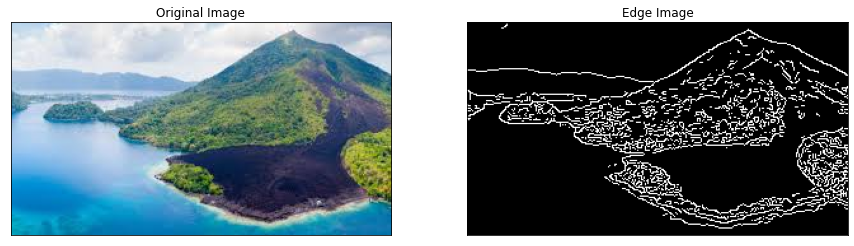

In [24]:
edges = cv2.Canny(img,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()